#**Feature Engineering**

***Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning.*** 

Feature engineering is a machine learning technique that leverages data to create new variables that aren’t in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy. Feature engineering is required when working with machine learning models. Regardless of the data or architecture, a terrible feature will have a direct impact on your model.

**Feature engineering consists of various process**

* ***Feature Creation-***Creating features involves creating new variables which will be most helpful for our model. This can be adding or removing some features.
* ***Transformations-***Feature transformation is simply a function that transforms features from one representation to another. The goal here is to plot and visualise data, if something is not adding up with the new features we can reduce the number of features used, speed up training, or increase the accuracy of a certain model.
* ***Feature Extraction-***Feature extraction is the process of extracting features from a data set to identify useful information. Without distorting the original relationships or significant information, this compresses the amount of data into manageable quantities for algorithms to process.
* ***Exploratory Data Analysis-***Exploratory data analysis (EDA) is a powerful and simple tool that can be used to improve your understanding of your data, by exploring its properties. The technique is often applied when the goal is to create new hypotheses or find patterns in the data. It’s often used on large amounts of qualitative or quantitative data that haven’t been analyzed before.
* ***Benchmark-***A Benchmark Model is the most user-friendly, dependable, transparent, and interpretable model against which you can measure your own. It’s a good idea to run test datasets to see if your new machine learning model outperforms a recognised benchmark. These benchmarks are often used as measures for comparing the performance between different machine learning models like neural networks and support vector machines, linear and non-linear classifiers, or different approaches like bagging and boosting.

**Importance Of Feature Engineering**

Feature Engineering is a very important step in machine learning. Feature engineering refers to the process of designing artificial features into an algorithm. These artificial features are then used by that algorithm in order to improve its performance, or in other words reap better results. Data scientists spend most of their time with data, and it becomes important to make models accurate.

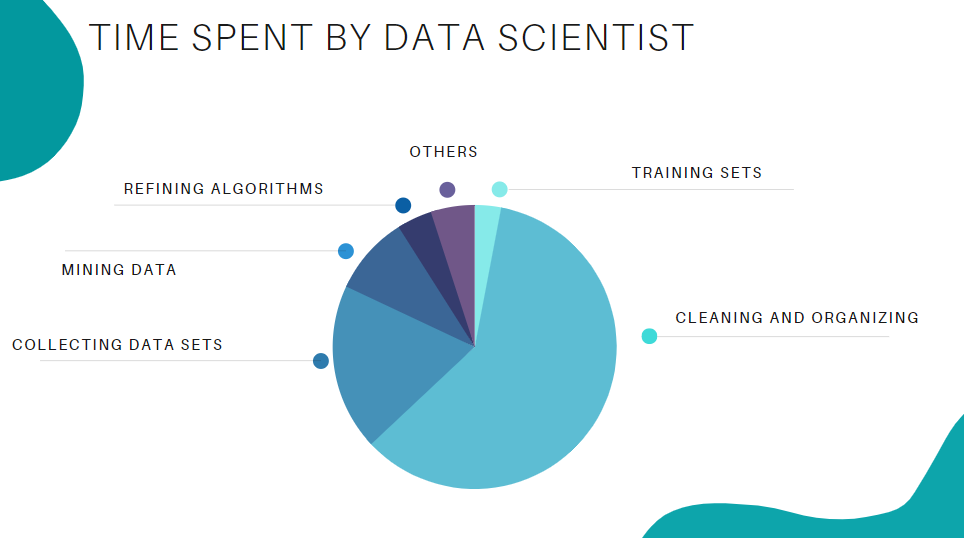

However, the concept of transparency for the machine learning models is a complicated thing as different models often require different approaches for the different kinds of data.

* Imputation
* Handling Outliers
* Binning
* Log Transform
* One-Hot Encoding 
* Grouping Operations
* Feature Split
* Scaling
* Extracting Date

##**1-Handling Missing Values**

We use imputation because Missing data can cause the below issues: –

* ***Incompatible with most of the Python libraries used in Machine Learning:-*** Yes, you read it right. While using the libraries for ML(the most common is skLearn), they don’t have a provision to automatically handle these missing data and can lead to errors.
* ***Distortion in Dataset:-*** A huge amount of missing data can cause distortions in the variable distribution i.e it can increase or decrease the value of a particular category in the dataset.
* ***Affects the Final Model:-*** the missing data can cause a bias in the dataset and can lead to a faulty analysis by the model.

Another and the most important reason is “We want to restore the complete dataset”. This is mostly in the case when we do not want to lose any(more of) data from our dataset as all of it is important, & secondly, dataset size is not very big, and removing some part of it can have a significant impact on the final model.


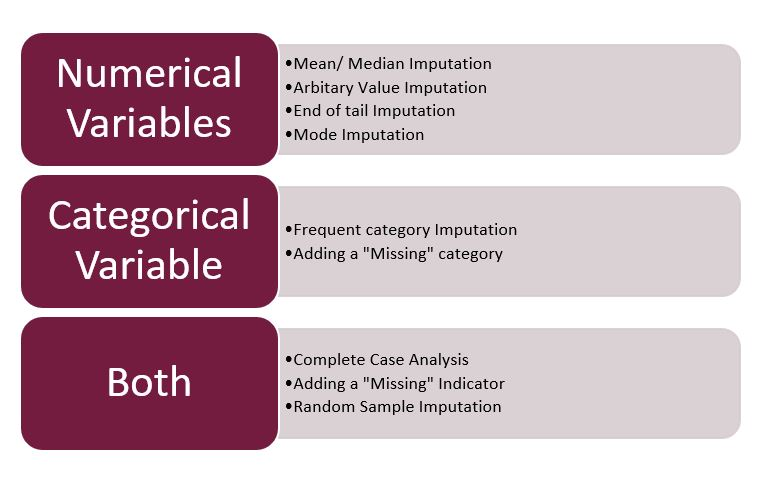




###**1.1-Numerical Imputation**

Imputation is a more preferable option rather than dropping because it preserves the data size. However, there is an important selection of what you impute to the missing values.
Except for the case of having a default value for missing values, I think the best imputation way is to use the medians of the columns. As the averages of the columns are sensitive to the outlier values, while medians are more solid in this respect.

In [ ]:
# Impute with Mean
from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='mean', fill_value=None, verbose=0, copy=True, add_indicator=False)

data=imp.fit_transform(data)

###**1.2-Categorical Imputation**

Replacing the missing values with the maximum occurred value in a column is a good option for handling categorical columns. But if you think the values in the column are distributed uniformly and there is not a dominant value, imputing a category like “Other” might be more sensible, because in such a case, your imputation is likely to converge a random selection.


In [ ]:
# Impute with Most Frequent (also for Categorical Features)
from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='most_frequent')

data=imp.fit_transform(data)

###**1.3-An Extension To Imputation**

Imputation is the standard approach, and it usually works well. However, imputed values may be systematically above or below their actual values (which weren't collected in the dataset). Or rows with missing values may be unique in some other way. In that case, your model would make better predictions by considering which values were originally missing.


In [ ]:
# Impute with Indicator
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.pipeline import make_pipeline,FeatureUnion

imp=FeatureUnion(['features',SimpleImputer(strategy='mean'),
                'indicator',MissingIndicator()])

data=imp.fit_transform(data)

In [ ]:
# Impute with Indicator 2
from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='median',add_indicator=True)

data=imp.fit_transform(data)

##**2-Outliers**

Outliers are those observations that differ strongly(different properties) from the other data points in the sample of a population.

***Problems caused by outliers***

1. Outliers in the data may causes problems during model fitting (esp. linear models).
2. Outliers may inflate the error metrics which give higher weights to large errors (example, mean squared error, RMSE).



###**2.1-Z-Scores**

The Z-score(also called the standard score) is an important concept in statistics that indicates how far away a certain point is from the mean. By applying Z-transformation we shift the distribution and make it 0 mean with unit standard deviation. For example — A Z-score of 2 would mean the data point is 2 standard deviation away from the mean.


In [ ]:
# Using Z-Scores
import numpy as np
mean=np.mean(data)
std=np.std(data)
filtered = df[~(df['a'] == 2)]
data = data[~data[(i - mean)/std > 2]

In [ ]:
# Using Z-Scores
from scipy import stats

for col in data.columns:
  stats.zscore(col, axis = 1)

###**2.2-Local Outlier Factor**

In Local Outlier Factor (LOF), the idea revolves around the concept of local regions. Here, we calculate and compare the local density of the focus point with the local density of its neighbours. If we find that the local density of the focus point is very low compared to its neighbours, that would kind of hint that the focus point is isolated in that space and is a potential outlier. The algorithm depends on the hyperparameter K, which decides upon the number of neighbours to consider when calculating the local density. This value is bounded between 0 (no neighbour) and the total points (all points being neighbour) in the space.

In [ ]:
# Using Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=2, metric='manhattan')

prediction = lof.fit_predict(data)

###**2.3-Isolation Forest**

Isolation Forest is a tree-based algorithm that tries to find out outliers based on the concept of decision boundaries(just like we have for decision trees). The idea over here is to keep splitting the data at random thresholds and feature till every point gets isolated(it’s like overfitting a decision tree on a dataset). Once the isolation is achieved we chunk out points that got isolated pretty early during this process. And we mark these points as potential outliers. If you see this intuitively, the farther a point is from the majority, the easier it gets to isolate, whereas, isolating the points that are part of a group would require more cuts to isolate every point.

In [ ]:
# Using Isolation Forest
from sklearn.ensemble import IsolationForest

# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)

yhat = iso.fit_predict(X_train)

# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

###**2.4-One-Class SVM**

The support vector machine, or SVM, algorithm developed initially for binary classification can be used for one-class classification.

When modeling one class, the algorithm captures the density of the majority class and classifies examples on the extremes of the density function as outliers. This modification of SVM is referred to as One-Class SVM.

Although SVM is a classification algorithm and One-Class SVM is also a classification algorithm, it can be used to discover outliers in input data for both regression and classification datasets.

The class provides the “nu” argument that specifies the approximate ratio of outliers in the dataset, which defaults to 0.1.

In [ ]:
# One-Class SVM
from sklearn.svm import OneClassSVM

# identify outliers in the training dataset
ee = OneClassSVM(nu=0.01)

yhat = ee.fit_predict(X_train)

# select all rows that are not outliers
mask = yhat != -1

##**3-Smoothing/Binning**

Binning method is used to smoothing data or to handle noisy data. In this method, the data is first sorted and then the sorted values are distributed into a number of buckets or bins. As binning methods consult the neighborhood of values, they perform local smoothing.

***There are three approaches to perform smoothing –***

* ***Smoothing by bin means :*** In smoothing by bin means, each value in a bin is replaced by the mean value of the bin.
* ***Smoothing by bin median :*** In this method each bin value is replaced by its bin median value.
* ***Smoothing by bin boundary :*** In smoothing by bin boundaries, the minimum and maximum values in a given bin are identified as the bin boundaries. Each bin value is then replaced by the closest boundary value.

***Approach -***

1. Sort the array of given data set.
2. Divides the range into N intervals, each containing the approximately same number of samples(Equal-depth partitioning).
3. Store mean/ median/ boundaries in each row.

In [ ]:
#Numerical Binning Example
data['bin'] = pd.cut(data['value'], bins=[0,30,70,100], labels=["Low", "Mid", "High"])

In [ ]:
#Categorical Binning Example
conditions = [
data['Country'].str.contains('Spain'),
data['Country'].str.contains('Italy'),
data['Country'].str.contains('Chile'),
data['Country'].str.contains('Brazil')]

choices = ['Europe', 'Europe', 'South America', 'South America']

data['Continent'] = np.select(conditions, choices, default='Other')

In [ ]:
# Using KBinsDiscretizer
from sklearn.preprocessing import KBinsDiscretizer

kbd=KBinsDiscretizer(n_bins=5, *, encode='onehot', strategy='kmeans', dtype=None)

kbd.fit_transform(data)

##**4-Feature Transform & Scale**

It is a technique by which we can boost our model performance. ***Feature transformation*** is a mathematical transformation in which we apply a mathematical formula to a particular column(feature) and transform the values which are useful for our further analysis.

It is also known as ***Feature Engineering***, which is creating new features from existing features that may help in improving the model performance.

It refers to the family of algorithms that create new features using the existing features. These new features may not have the same interpretation as the original features, but they may have more explanatory power in a different space rather than in the original space.

This can also be used for ***Feature Reduction***. It can be done in many ways, by linear combinations of original features or by using non-linear functions.

***Goal of Feature Transformations***

As we know that Normal Distribution is a very important distribution in Statistics, which is key to many statisticians for solving problems in statistics. Usually, the data distribution in Nature follows a Normal distribution (examples like – age, income, height, weight, etc., ). But the features in the real-life data are not normally distributed, however it is the best approximation when we are not aware of the underlying distribution pattern.

***Reasons for using transformations***

1. ***Convenience -*** A transformed scale may be as natural as the original scale and more convenient for a specific purpose (e.g. percentages rather than original data, sines rather than degrees). One important example is standardization.

2. ***Reducing skewness -*** A transformation may be used to reduce skewness. A distribution that is symmetric or nearly so is often easier to handle and interpret than a skewed distribution. To reduce right skewness, take roots or logarithms or reciprocals (roots are weakest). This is the commonest problem in practice. To reduce left skewness, take squares or cubes or higher powers.

3. ***Equal spreads -*** A transformation may be used to produce approximately equal spreads, despite marked variations in level, which again makes data easier to handle and interpret.

4. ***Linear relationships -*** When looking at relationships between variables, it is often far easier to think about patterns that are approximately linear than about patterns that are highly curved.

5. ***Additive relationships -*** Relationships are often easier to analyse when additive rather than multiplicative.

1. MinMax Scaler
2. Standard Scaler
3. MaxAbsScaler
4. Robust Scaler
5. Quantile Transformer Scaler
6. Log Transformation
7. Power Transformer Scaler
8. Unit Vector Scaler/Normalizer

***Further Reading***

https://analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

###**4.1-MinMax Scaler**

The MinMax scaler is one of the simplest scalers to understand.  It just scales all the data between 0 and 1.

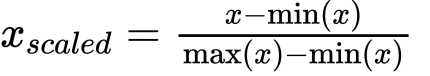

Thus, a point to note is that it does so for every feature separately. Though (0, 1) is the default range, we can define our range of max and min values as well. 

In [ ]:
# MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit_transform(data)

###**4.2-Standard Scaler**

The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.
In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).
Given the distribution of the data, each value in the dataset will have the mean value subtracted, and then divided by the standard deviation of the whole dataset (or feature in the multivariate case).

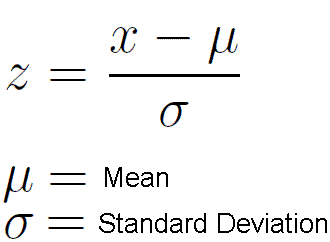

Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler.

***Advantages -***scales features such that the distribution is centered around 0, with a standard deviation of 1.

***Disdvantages -***not good if the data is not normally distributed (i.e. no Gaussian Distribution).

In [ ]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(data)

###**4.3-MaxAbsScaler**

In simplest terms, the MaxAbs scaler takes the absolute maximum value of each column and divides each value in the column by the maximum value.

Thus, it first takes the absolute value of each value in the column and then takes the maximum value out of those. This operation scales the data between the range [-1, 1]. 

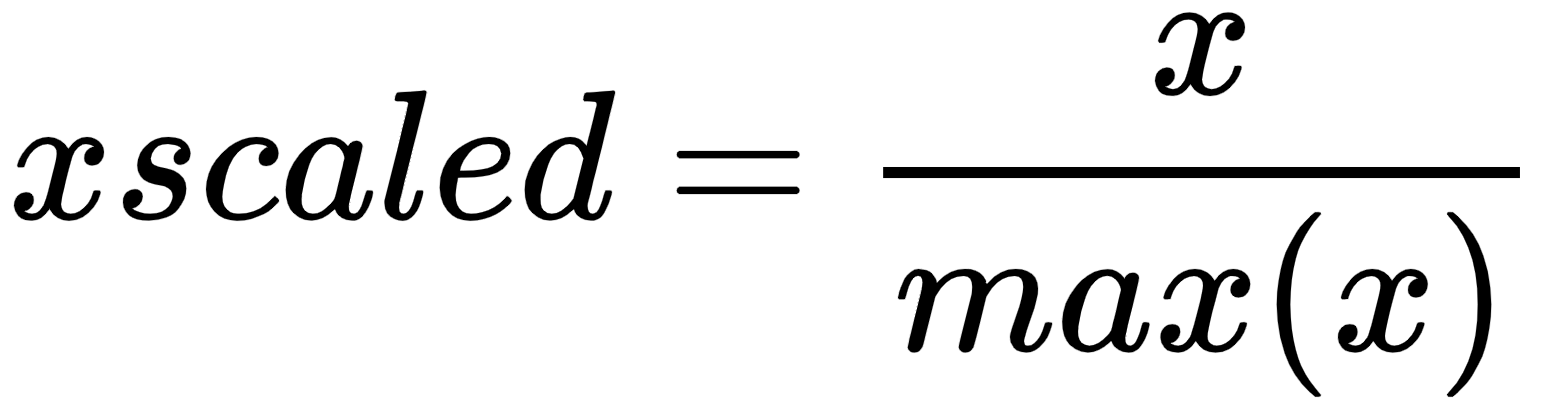

In [ ]:
# MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler

transformer = MaxAbsScaler()

transformer.fit_transform(data)

###**4.4-Robust Scaler**

Robust Scaler algorithms scale features that are robust to outliers. The method it follows is almost similar to the MinMax Scaler but it uses the interquartile range (rather than the min-max used in MinMax Scaler). The median and scales of the data are removed by this scaling algorithm according to the quantile range.

The Robust Scaler, as the name suggests is not sensitive to outliers. This scaler-

* removes the median from the data
* scales the data by the InterQuartile Range(IQR)

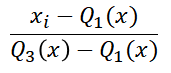

Where Q1 is the 1st quartile, and Q3 is the third quartile.

Robust Scaler uses the Inter Quartile Range by default, which is the range between the 1st quartile and the 3rd quartile. The quantile range can also be manually specified by using the quantile_range parameter.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.

***Advantages -***similar to normalization but it instead uses the interquartile range, so that it is robust to outlier

***Disadvantages -***doesn't take the median into account and only focuses on the parts where the bulk data is.

In [ ]:
# RobustScaler
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler()

train[dis_train]= rs.fit_transform(train[dis_train])

NameError: ignored

###**4.5-Quantile Transformer Scaler**

Quantile Transformer Scaler converts the variable distribution to a normal distribution. and scales it accordingly. Since it makes the variable normally distributed, it also deals with the outliers. Here are a few important points regarding the Quantile Transformer Scaler:

1. It computes the cumulative distribution function of the variable

2. It uses this cdf to map the values to a normal distribution

3. Maps the obtained values to the desired output distribution using the associated quantile function

***A caveat to keep in mind though: Since this scaler changes the very distribution of the variables, linear relationships among variables may be destroyed by using this scaler. Thus, it is best to use this for non-linear data.***

In [ ]:
# Quantile Transformer Scaler
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(n_quantiles=10,output_distribution='normal')

qt.fit_transform(data)

###**4.6-Log Transform**

It is primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution. In this transform, we take the log of the values in a column and use these values as the column instead.

Why does it work? It is because the log function is equipped to deal with large numbers.

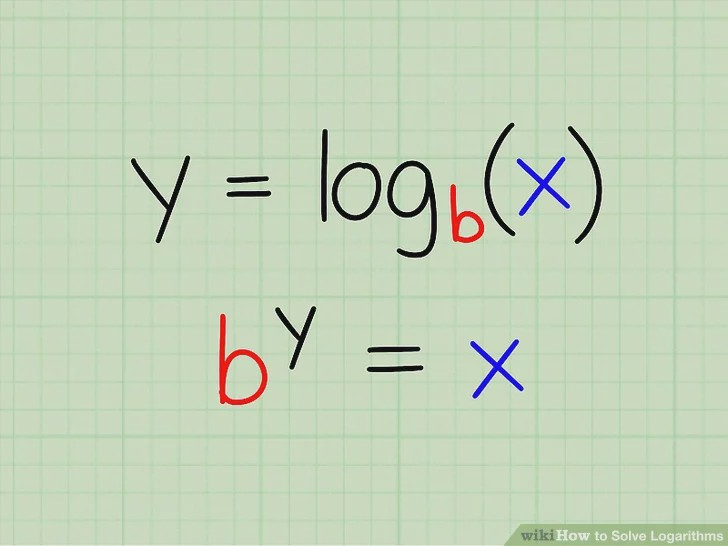

If you assume a model form that is non-linear but can be transformed to a linear model such as logY=β0+β1t then one would be justified in taking logarithms of Y to meet the specified model form. In general whether or not you have causal series , the only time you would be justified or correct in taking the Log of Y is when it can be proven that the Variance of Y is proportional to the Expected Value of Y2 .

*A small caveat though – if our data has negative values or values ranging from 0 to 1, we cannot apply log transform directly – since the log of negative numbers and numbers between 0 and 1 is undefined, we would get error or NaN values in our data. In such cases, we can add a number to these values to make them all greater than 1. Then, we can apply the log transform.*



In [ ]:
# Log Transform
data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})
data['log+1'] = (data['value']+1).transform(np.log)

# Negative Log Transform 
data['log'] = (data['value']-data['value'].min()+1) .transform(np.log)

In [ ]:
# Using Log1P Transformer
data = np.log1p(data)

###**4.7-Power Transformer Scaler**

Use it when dealing with heteroskedasticity. Like some other scalers we studied above, the Power Transformer also changes the distribution of the variable, as in, it makes it more Gaussian(normal). We are familiar with similar power transforms such as square root, and cube root transforms, and log transforms.

However, to use them, we need to first study the original distribution, and then make a choice. The Power Transformer actually automates this decision making by introducing a parameter called lambda. It decides on a generalized power transform by finding the best value of lambda using either the:

1. Box-Cox transform

2. The Yeo-Johnson transform

While I will not get into too much detail of how each of the above transforms works, it is helpful to know that Box-Cox works with only positive values, while Yeo-Johnson works with both positive and negative values.

In [ ]:
# Power Transformer Scaler
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()

scaler.fit_transform(data)

###**4.8-Unit Vector Scaler/Normalizer**

Normalization is the process of scaling individual samples to have unit norm. The most interesting part is that unlike the other scalers which work on the individual column values, the Normalizer works on the rows! Each row of the dataframe with at least one non-zero component is rescaled independently of other samples so that its norm (l1, l2, or inf) equals one.

Just like MinMax Scaler, the Normalizer also converts the values between 0 and 1, and between -1 to 1 when there are negative values in our data.

However, there is a difference in the way it does so.

* If we are using L1 norm, the values in each column are converted so that the sum of their absolute values along the row = 1
* If we are using L2 norm, the values in each column are first squared and added so that the sum of their absolute values along the row = 1

In [ ]:
# Unit Vector Scaler/Normalizer
from sklearn.preprocessing import Normalizer

scaler = Normalizer()

scaler.fit_transform(data)

###**4.9-Custom Function Transform**

It allows you to specify a function that is called to transform the data. You can define the function and perform any valid change, such as changing values or removing columns of data (not removing rows).

It can then be used just like any other data transform in scikit-learn, e.g. to transform data directly, or used in a modeling pipeline.

The catch is that the transform is stateless, meaning that no state can be kept.This means that the transform cannot be used to calculate statistics on the training dataset that are then used to transform the train and test datasets.

In addition to custom scaling operations, this can be helpful for standard data cleaning operations, such as identifying and removing columns with few unique values and identifying and removing relative outliers.

In [ ]:
# Using Custom Function Transformer
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)

transformer.fit_transform(data)

##**5-Categorical Features**

Machine learning models require all input and output variables to be numeric.

This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model.

The two most popular techniques are an Ordinal Encoding and a One-Hot Encoding.

There are three common approaches for converting ordinal and categorical variables to numerical values. They are:

* Ordinal Encoding
* One-Hot Encoding
* Dummy Variable Encoding
 


###**5.1-Label Encoding**

Label encoding assigns each unique value to a different integer.
This approach assumes an ordering of the categories.
Not all categorical variables have a clear ordering in the values, but we refer to those that do as ordinal variables. For tree-based models (like decision trees and random forests), you can expect label encoding to work well with ordinal variables.

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()

le.fit_transform(data)

###**5.2-Ordinal Encoding**

We use this categorical data encoding technique when the categorical feature is ordinal. In this case, retaining the order is important. Hence encoding should reflect the sequence.

In [ ]:
# Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

encoder.fit_transform(data)

###**5.3-One-Hot Encoding**

We use this categorical data encoding technique when the features are nominal(do not have any order). In one hot encoding, for each level of a categorical feature, we create a new variable. Each category is mapped with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence of that category.

These newly created binary features are known as Dummy variables. The number of dummy variables depends on the levels present in the categorical variable. 

In [ ]:
# One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='if_binary')

ohe.fit_transform(data)

###**5.4-Target Encoding**

Target encoding is a Baysian encoding technique.

Bayesian encoders use information from dependent/target variables to encode the categorical data.

In target encoding, we calculate the mean of the target variable for each category and replace the category variable with the mean value. In the case of the categorical target variables, the posterior probability of the target replaces each category.

We perform Target encoding for train data only and code the test data using results obtained from the training dataset. Although, a very efficient coding system, it has the following issues responsible for deteriorating the model performance-
1. It can lead to target leakage or overfitting. To address overfitting we can use different techniques.
2. In the leave one out encoding, the current target value is reduced from the overall mean of the target to avoid leakage.
3. In another method, we may introduce some Gaussian noise in the target statistics. The value of this noise is hyperparameter to the model.
4. The second issue, we may face is the improper distribution of categories in train and test data. In such a case, the categories may assume extreme values. Therefore the target means for the category are mixed with the marginal mean of the target.

In [ ]:
# Target Encoding
from category_encoders import TargetEncoder

encoder = TargetEncoder(smoothing=1.0)

encoder.fit_transform(data)

###**5.5-Dummy Variable Encoding**

The one-hot encoding creates one binary variable for each category.

The problem is that this representation includes redundancy. For example, if we know that [1, 0, 0] represents “blue” and [0, 1, 0] represents “green” we don’t need another binary variable to represent “red“, instead we could use 0 values for both “blue” and “green” alone, e.g. [0, 0].

This is called a dummy variable encoding, and always represents C categories with C-1 binary variables.

In [ ]:
# Dummy Variable Encoding / Trap
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

encoder.fit_transform(data)

###**5.6-OHE with many Categories**

Many times we come across features having multiple unique values. It becomes infeasible to make separate columns for each of the categories which leads to “curse of dimensionality”.

***What can we do instead?***
In the winning solution of the KDD 2009 cup: “Winning the KDD Cup Orange Challenge with Ensemble Selection”, the authors limited one-hot encoding to the 10 most frequent labels of the variable which means that they would make one binary variable for each of the 10 most frequent labels only. It is equivalent to grouping all the other labels under a new category that in this case, will be dropped. Thus, the 10 new dummy variables indicate if one of the 10 most frequent labels is present (1) or not (0) for a particular observation.
The top 10 variables is a totally arbitrary number. One could also choose the top 5 or 20 depending on the dataset.
Some pros and cons of this technique are:

***Pros:***

* Does not require much time for variable exploration.
* Does not expand massively the feature space.

***Cons:***

* Does not add any information that may make the variable more predictive
* Does not keep the information about the ignored labels.


In [ ]:
categorical_cols = ['a', 'b', 'c', 'd']

# Let's say we have a column 'b' which has more than 500 categories.
# Find the top 10 most frequent categories for column 'b'
data.b.value_counts().sort_values(ascending = False).head(20)

# make a list of the most frequent categories of the column
top_10_occurring_cat = [cat for cat in data.b.value_counts().sort_values(ascending = False).head(10).index]

# now make the 10 binary variables
for cat in top_10_occurring_cat:
    data[cat] = np.where(data['b'] == cat, 1, 0) # whenever data['b'] == cat replace it with 1 else 0

###**5.7-Frequency Encoding**

Frequency encoding is a way to utilize frequencies of categories as labels. It can help if frequency correlates with the target and also, it can help the model to understand that smaller categories are less trustworthy then bigger ones, especially when frequency encoding is used parallel with other type of encoding.

***Advantages (compared to one-hot encoding):***

* Faster learning than with one-hot representations. Numbers in  R1  are way more compact representations then vectors in  Rn−1  used in one-hot encoding, that leads to fewer features for trees, which leads to faster learning.
* Less splits needed, means a more robust model. Unlike with one hot encoding, here trees can separate several categories at a time (with one-hot it is always 1).
* Easy to implement.

***Disadvantages:***

* Bias. Label encoding is biased in a way that assumes a particular ordered relationship between categories. In reality, due to randomness in assigning labels, that relationship does not exist.
* Nonlinearity towards target variable, more splits. At each binary split, tree models need to find a value of a variable that separates the target as good as possible. It is when feature and target have almost zero linear dependencies. Trees have to do a lot of splits to put individual categories in separate buckets to continue to improve train loss.

In [ ]:
# Frequency Encoding

# grouping by frequency
fq = df.groupby('nom_0').size()/len(df)

# mapping values to dataframe
df.loc[:, "{}_freq_encode".format('nom_0')] = df['nom_0'].map(fq)

# drop original column.
df = df.drop(['nom_0'], axis = 1)
fq.plot.bar(stacked = True)

##**6-Gouping**

The key point of group by operations is to decide the aggregation functions of the features. For numerical features, average and sum functions are usually convenient options, whereas for categorical features it more complicated.

***Categorical Column Grouping***

I suggest three different ways for aggregating categorical columns:
1. ***Lambda Function -***The first option is to select the label with the highest frequency. In other words, this is the max operation for categorical columns, but ordinary max functions generally do not return this value, you need to use a lambda function for this purpose.
2. ***Pivot Table -*** This approach resembles the encoding method in the preceding step with a difference. Instead of binary notation, it can be defined as aggregated functions for the values between grouped and encoded columns. This would be a good option if you aim to go beyond binary flag columns and merge multiple features into aggregated features, which are more informative.
3. ***OHE + Group By -***Last categorical grouping option is to apply a group by function after applying one-hot encoding. This method preserves all the data -in the first option you lose some-, and in addition, you transform the encoded column from categorical to numerical in the meantime. 

***Numerical Column Grouping***

Numerical columns are grouped using sum and mean functions in most of the cases. Both can be preferable according to the meaning of the feature. For example, if you want to obtain ratio columns, you can use the average of binary columns. In the same example, sum function can be used to obtain the total count either.

In [ ]:
# Using Grouping Based on Highest Frequency
data.groupby('id').agg(lambda x: x.value_counts().index[0])

In [ ]:
#Pivot Table
data.pivot_table(index='column_to_group', columns='column_to_encode', values='aggregation_column', aggfunc=np.sum, fill_value = 0)

In [ ]:
# Numerical Column Grouping

#sum_cols: List of columns to sum
#mean_cols: List of columns to average
grouped = data.groupby('column_to_group')

sums = grouped[sum_cols].sum().add_suffix('_sum')
avgs = grouped[mean_cols].mean().add_suffix('_avg')

new_df = pd.concat([sums, avgs], axis=1)

##**7-Split**

Splitting features is a good way to make them useful in terms of machine learning. Most of the time the dataset contains string columns that violates tidy data principles. By extracting the utilizable parts of a column into new features:
* We enable machine learning algorithms to comprehend them.
* Make possible to bin and group them.
* Improve model performance by uncovering potential information.

Split function is a good option, however, there is no one way of splitting features. It depends on the characteristics of the column, how to split it. Let’s introduce it with two examples. First, a simple split function for an ordinary name column:

In [ ]:
data.name

#Extracting first names
data.name.str.split(" ").map(lambda x: x[0])

#Extracting last names
data.name.str.split(" ").map(lambda x: x[-1])

#String extraction example
data.title.head()
data.title.str.split("(", n=1, expand=True)[1].str.split(")", n=1, expand=True)[0]

##**8-Date/Time**

Though date columns usually provide valuable information about the model target, they are neglected as an input or used nonsensically for the machine learning algorithms. It might be the reason for this, that dates can be present in numerous formats, which make it hard to understand by algorithms, even they are simplified to a format like "01–01–2017".
Building an ordinal relationship between the values is very challenging for a machine learning algorithm if you leave the date columns without manipulation. 
Here, I suggest three types of preprocessing for dates:

* Extracting the parts of the date into different columns: Year, month, day, etc.
* Extracting the time period between the current date and columns in terms of years, months, days, etc.
*Extracting some specific features from the date: Name of the weekday, Weekend or not, holiday or not, etc.

If you transform the date column into the extracted columns like above, the information of them become disclosed and machine learning algorithms can easily understand them.

In [ ]:
import pandas as pd
from datetime import date

data = pd.DataFrame({'date':
['01-01-2017',
'04-12-2008',
'23-06-1988',
'25-08-1999',
'20-02-1993',
]})

#Transform string to date
data['date'] = pd.to_datetime(data.date, format="%d-%m-%Y")

#Extracting Year
data['year'] = data['date'].dt.year

#Extracting Month
data['month'] = data['date'].dt.month

#Extracting passed years since the date
data['passed_years'] = date.today().year - data['date'].dt.year

#Extracting passed months since the date
data['passed_months'] = (date.today().year - data['date'].dt.year) * 12 + date.today().month - data['date'].dt.month

#Extracting the weekday name of the date
data['day_name'] = data['date'].dt.day_name()
data

##**9-Feature Selection**

Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model. The data features that you use to train your machine learning models have a huge influence on the performance you can achieve.

***Irrelevant or partially relevant features can negatively impact model performance.Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in.***

Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features.

***How to select features and what are Benefits of performing feature selection before modeling your data?***

* **Reduces Overfitting:** Less redundant data means less opportunity to make decisions based on noise.
* **Improves Accuracy:** Less misleading data means modeling accuracy improves.
* **Reduces Training Time:** fewer data points reduce algorithm complexity and algorithms train faster.

###**9.1-Filter Methods**

These methods are generally used while doing the pre-processing step. These methods select features from the dataset irrespective of the use of any machine learning algorithm. In terms of computation, they are very fast and inexpensive and are very good for removing duplicated, correlated, redundant features but these methods do not remove multicollinearity. Selection of feature is evaluated individually which can sometimes help when features are in isolation (don’t have a dependency on other features) but will lag when a combination of features can lead to increase in the overall performance of the model.

***Some techniques used are:-***

* ***Information Gain –*** It is defined as the amount of information provided by the feature for identifying the target value and measures reduction in the entropy values. Information gain of each attribute is calculated considering the target values for feature selection.
* ***Chi-square test —*** Chi-square method (X2) is generally used to test the relationship between categorical variables. It compares the observed values from different attributes of the dataset to its expected value.
* ***Fisher’s Score –*** Fisher’s Score selects each feature independently according to their scores under Fisher criterion leading to a suboptimal set of features. The larger the Fisher’s score is, the better is the selected feature.
* ***Correlation Coefficient –*** Pearson’s Correlation Coefficient is a measure of quantifying the association between the two continuous variables and the direction of the relationship with its values ranging from -1 to 1.
* ***Variance Threshold –*** It is an approach where all features are removed whose variance doesn’t meet the specific threshold. By default, this method removes features having zero variance. The assumption made using this method is higher variance features are likely to contain more information.
* ***Mean Absolute Difference (MAD) –*** This method is similar to variance threshold method but the difference is there is no square in MAD. This method calculates the mean absolute difference from the mean value.
* ***Dispersion Ratio –*** Dispersion ratio is defined as the ratio of the Arithmetic mean (AM) to that of Geometric mean (GM) for a given feature. Its value ranges from +1 to ∞ as AM ≥ GM for a given feature. Higher dispersion ratio implies a more relevant feature.
* ***Mutual Dependence –*** This method measures if two variables are mutually dependent, and thus provides the amount of information obtained for one variable on observing the other variable. Depending on the presence/absence of a feature, it measures the amount of information that feature contributes to making the target prediction.
* ***Relief –*** This method measures the quality of attributes by randomly sampling an instance from the dataset and updating each feature and distinguishing between instances that are near to each other based on the difference between the selected instance and two nearest instances of same and opposite classes.

In [ ]:
# Using Chi-square test

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_digits(return_X_y=True)
X.shape

X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
X_new.shape

(1797, 20)

###**9.2-Wrapper methods**

Wrapper methods, also referred to as greedy algorithms train the algorithm by using a subset of features in an iterative manner. Based on the conclusions made from training in prior to the model, addition and removal of features takes place. Stopping criteria for selecting the best subset are usually pre-defined by the person training the model such as when the performance of the model decreases or a specific number of features has been achieved. The main advantage of wrapper methods over the filter methods is that they provide an optimal set of features for training the model, thus resulting in better accuracy than the filter methods but are computationally more expensive.

**Some techniques used are:-**

* ***Forward selection –*** This method is an iterative approach where we initially start with an empty set of features and keep adding a feature which best improves our model after each iteration. The stopping criterion is till the addition of a new variable does not improve the performance of the model.
* ***Backward elimination –*** This method is also an iterative approach where we initially start with all features and after each iteration, we remove the least significant feature. The stopping criterion is till no improvement in the performance of the model is observed after the feature is removed.
* ***Bi-directional elimination –*** This method uses both forward selection and backward elimination technique simultaneously to reach to one unique solution.
* ***Exhaustive selection –*** This technique is considered as the brute force approach for the evaluation of feature subsets. It creates all possible subsets and builds a learning algorithm for each subset and selects the subset whose model’s performance is best.
* ***Recursive elimination –*** This greedy optimization method selects features by recursively considering the smaller and smaller set of features. The estimator is trained on an initial set of features and their importance is obtained using feature_importance_attribute. The least important features are then removed from the current set of features till we are left with the required number of features.



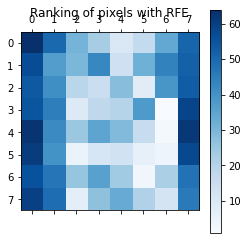

In [ ]:
# Using Recursive elimination
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

###**9.3-Embedded methods**

In embedded methods, the feature selection algorithm is blended as part of the learning algorithm, thus having its own built-in feature selection methods. Embedded methods encounter the drawbacks of filter and wrapper methods and merge their advantages. These methods are faster like those of filter methods and more accurate than the filter methods and take into consideration a combination of features as well.

**Some techniques used are:-**

* ***Regularization –*** This method adds a penalty to different parameters of the machine learning model to avoid over-fitting of the model. This approach of feature selection uses Lasso (L1 regularization) and Elastic nets (L1 and L2 regularization). The penalty is applied over the coefficients, thus bringing down some coefficients to zero. The features having zero coefficient can be removed from the dataset.
* ***Tree-based methods –*** These methods such as Random Forest, Gradient Boosting provides us feature importance as a way to select features as well. Feature importance tells us which features are more important in making an impact on the target feature.

In [ ]:
# Using Regularization
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)

### Apply Feature Selection
# first, I specify the Lasso Regression model, and I select a suitable alpha (equivalent of penalty). The bigger the 
# alpha the less features that will be selected. Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
model.fit(X, y)
model.get_support()

array([False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True])

##**10-Imbalanced DataSet**

Imbalanced datasets are a special case for classification problem where the class distribution is not uniform among the classes. Typically, they are composed by two classes: The majority (negative) class and the minority (positive) class

Imbalanced datasets can be found for different use cases in various domains:

* **Finance:** Fraud detection datasets commonly have a fraud rate of ~1–2%
* **Ad Serving:** Click prediction datasets also don’t have a high clickthrough rate.
* **Transportation/Airline:** Will Airplane failure occur?
* **Medical:** Does a patient has cancer?
* **Content moderation:** Does a post contain NSFW content?

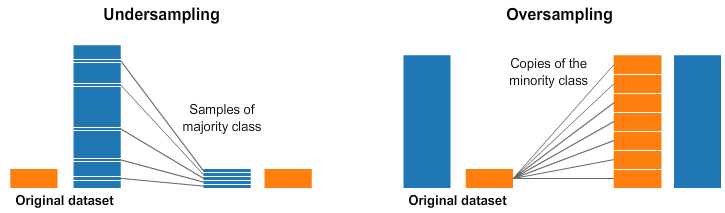

***Undersampling using Tomek Links:***
 
One of such methods it provides is called Tomek Links. Tomek links are pairs of examples of opposite classes in close vicinity.

In this algorithm, we end up removing the majority element from the Tomek link, which provides a better decision boundary for a classifier.

***Oversampling using SMOTE:***
 
In SMOTE (Synthetic Minority Oversampling Technique) we synthesize elements for the minority class, in the vicinity of already existing elements.


* Random resampling provides a naive technique for rebalancing the class distribution for an imbalanced dataset.
* Random oversampling duplicates examples from the minority class in the training dataset and can result in overfitting for some models.
* Random undersampling deletes examples from the majority class and can result in losing information invaluable to a model.

***Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset. Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset.***

Importantly, the change to the class distribution is only applied to the training dataset. The intent is to influence the fit of the models. The resampling is not applied to the test or holdout dataset used to evaluate the performance of a model.

In [ ]:
# UnderSampling

from imblearn.under_sampling import TomekLinks
tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)


In [ ]:
# DownSampling

from imblearn.under_sampling import NearMiss

# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss(random_state=42)
X_res,y_res=nm.fit_sample(X,Y)

In [ ]:
# OverSampling
# INCREASE SAMPLE

from imblearn.combine import SMOTETomek
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,Y)
# OR
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(ratio=0.5)
# This would ensure that the minority class was oversampled to have half the number of examples as the majority 
# class, for binary classification problems. This means that if the majority class had 1,000 examples and the 
# minority class had 100, the transformed dataset would have 500 examples of the minority class.
X_train_res, y_train_res = os.fit_sample(X, Y)

##**11-Feature Importance**

This approach directly measures feature importance by observing how random re-shuffling (thus preserving the distribution of the variable) of each predictor influences model performance.
The approach can be described in the following steps:
Train the baseline model and record the score (accuracy/R²/any metric of importance) by passing the validation set (or OOB set in case of Random Forest). This can also be done on the training set, at the cost of sacrificing information about generalization.
Re-shuffle values from one feature in the selected dataset, pass the dataset to the model again to obtain predictions and calculate the metric for this modified dataset. The feature importance is the difference between the benchmark score and the one from the modified (permuted) dataset.
Repeat 2. for all features in the dataset.

***Pros:***
* applicable to any model
* reasonably efficient
* reliable technique
* no need to retrain the model at each modification of the dataset

***Cons:***
* more computationally expensive than the default feature_importances
* permutation importance overestimates the importance of correlated predictors

In [ ]:
# Feature Importance
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(rf, X_train, y_train, r2)

###**11.1-SHAP values**

SHAP stands for “SHapley Additive exPlanations.” Shapley values are a widely used approach from cooperative game theory. The essence of Shapley value is to measure the contributions to the final outcome from each player separately among the coalition, while preserving the sum of contributions being equal to the final outcome.

When using SHAP values in model explanation, we can measure the input features’ contribution to individual predictions.

There are some other techniques used to explain models like permutation importance and partial dependence plots. Here are some benefits of using SHAP values over other techniques:

* ***Global interpretability:*** SHAP values not only show feature importance but also show whether the feature has a positive or negative impact on predictions.
* ***Local interpretability:*** We can calculate SHAP values for each individual prediction and know how the features contribute to that single prediction. Other techniques only show aggregated results over the whole dataset.

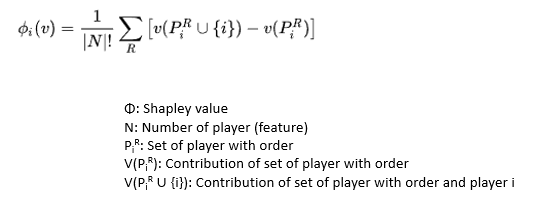

SHAP values can be used to explain a large variety of models including linear models (e.g. linear regression), tree-based models (e.g. XGBoost) and neural networks, while other techniques can only be used to explain limited model types.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d yasserh/wine-quality-dataset

#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

  0% 0.00/21.5k [00:00<?, ?B/s]
100% 21.5k/21.5k [00:00<00:00, 3.92MB/s]
Archive:  wine-quality-dataset.zip
replace WineQT.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: WineQT.csv              


In [ ]:
data=pd.read_csv('WineQT.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [ ]:
# SHAP Values
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

y=data[['quality']]
X=data.drop(['Id','quality'],axis=1)

model = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.001)
# Fit the Model
model.fit(X, y)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

for i in range(4):
  shap.force_plot(explainer.expected_value, shap_values[i], features=X.iloc[i], feature_names=X.columns)

plt.show()

[02:26:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


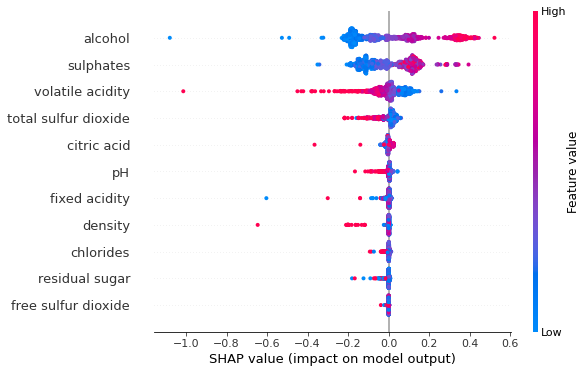

In [ ]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns)

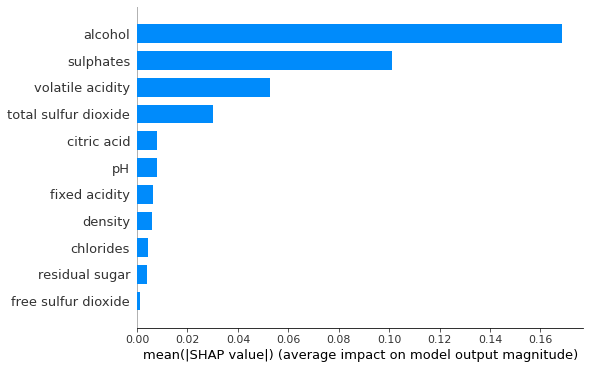

In [ ]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns, plot_type='bar')

###**11.2-ELI5**

There are a few differences from the basic approach of rfpimp and the one employed in eli5. Some of them are:
* there are parameters cv and refit connected to using cross-validation. In this example, I set them to None, as I do not use it but it might come in handy in some cases.
* there is a metric parameter, which as in rfpimp accepts a function in the form of metric(model, X, y). If this parameter is not specified, the function will use the default score method of the estimator.
* n_iter - number of random shuffle iterations, the end score is the average

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d yasserh/wine-quality-dataset

#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

  0% 0.00/21.5k [00:00<?, ?B/s]
100% 21.5k/21.5k [00:00<00:00, 4.37MB/s]
Archive:  wine-quality-dataset.zip
replace WineQT.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: WineQT.csv              


In [ ]:
data=pd.read_csv('WineQT.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [ ]:
# Eli5
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

y=data[['quality']]
X=data.drop(['Id','quality'],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf, cv = None, refit = False, n_iter = 50).fit(X_train, y_train)
perm_imp_eli5 = imp_df(X_train.columns, perm.feature_importances_)

NameError: ignored

###**11.3-LIME**

LIME (Local Interpretable Model-agnostic Explanations) is a technique explaining the predictions of any classifier/regressor in an interpretable and faithful manner. To do so, an explanation is obtained by locally approximating the selected model with an interpretable one (such as linear models with regularisation or decision trees). The interpretable models are trained on small perturbations (adding noise) of the original observation (row in case of tabular data), thus they only provide a good local approximation.
Some drawbacks to be aware of:
only linear models are used to approximate local behavior
type of perturbations that need to be performed on the data to obtain correct explanations are often use-case specific
simple (default) perturbations are often not enough. In an ideal case, the modifications would be driven by the variation that is observed in the dataset
Below you can see the output of LIME interpretation.
There are 3 parts of the output:
1. Predicted value
2. Feature importance — in case of regression it shows whether it has a negative or positive impact on the prediction, sorted by absolute impact descending.
3. Actual values of these features for the explained rows.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d yasserh/wine-quality-dataset

#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

  0% 0.00/21.5k [00:00<?, ?B/s]
100% 21.5k/21.5k [00:00<00:00, 4.57MB/s]
Archive:  wine-quality-dataset.zip
replace WineQT.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: WineQT.csv              


In [ ]:
data=pd.read_csv('WineQT.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [ ]:
# Lime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

y=data[['quality']]
X=data.drop(['Id','quality'],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)


import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   mode = 'regression',
                                                   feature_names = X_train.columns,
                                                   categorical_features = [3], 
                                                   categorical_names = ['CHAS'], 
                                                   discretize_continuous = True)
                                                   
exp = explainer.explain_instance(X_train.values, rf.predict, num_features = 5)
exp.show_in_notebook(show_all=False) #only the features used in the explanation are displayed

exp = explainer.explain_instance(X_train.values, rf.predict, num_features = 5)
exp.show_in_notebook(show_all=False)

ValueError: ignored